In [ ]:
!pip install fastai==1.0.52
from fastai.text import *

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
path = Path(os.getcwd())
path = path/'gdrive'/'My Drive'
news=path/'Thesis Data'/'full doc csv'
aa=path/'Thesis Data'/'Our dataset'
aa2=path/'Thesis Data'/'AA dataset'
char=path/'Thesis Data'/'char-ulm'

In [0]:
# stoi = collections.defaultdict(lambda:0, {v:k+1 for k,v in enumerate(vocab)})

### Make Character level csv of News Corpus

In [0]:
df = pd.read_csv(news/'full_doc.csv')

In [0]:
def separate(str):
#   return str
  ret = ""
  for c in str:
    ret = ret+" "+c
  return ret

In [0]:
df['text']=df['text'].apply(separate)

In [0]:
df.head()

,label,text,is_valid
0,opinion,উ চ ্ চ ম া ধ ্ য ম ি ক প র ী ক ্ ষ া র ...,False
1,opinion,জ া ত ি স ং ঘ ে র স হ ক া র ী ম হ া স চ ি...,False
2,opinion,এ ক ট া ম ে য় ে চ ি ঠ ি ল ি খ ে ছ ে ত...,False
3,opinion,গ ত ব ছ র ে র ন ভ ে ম ্ ব র ে র শ ে ষ ।...,False
4,opinion,ঢ া ক া ৴ আ গ ઍ ট ১ ৫ ( ি ব ি ড ি ন উ জ...,False


In [0]:
df.to_csv(news/'char_news.csv',index=False)

In [0]:
print(len(df))
df = df[df['label']!='politics']
print(len(df))

95855
75805


In [0]:
df.to_csv(news/'char_news_!politics.csv',index=False)

In [0]:
df=pd.read_csv(news/'char_news_!politics.csv')
print(len(df))
df = df[df['label']!='education']
df = df[df['label']!='sports']
print(len(df))
df.to_csv(news/'char_news_3less.csv',index=False)

75805
51690


In [0]:
df['label'].unique()

array(['opinion', 'international', 'economics', 'art', 'science_tech', 'crime', 'accident', 'environment',
       'entertainment'], dtype=object)

In [0]:
df = df[df['label']!='politics']
df = df[df['label']!='education']
df = df[df['label']!='sports']
print(len(df))
df.to_csv(news/'news_3less.csv',index=False)

51690


In [0]:
df.head()

,label,text,is_valid
0,opinion,উচ্চ মাধ্যমিক পরীক্ষার আগের দিন মঙ্গলবার এক বি...,False
1,opinion,জাতিসংঘের সহকারী মহাসচিব অস্কার ফার্নান্দেজ তা...,False
2,opinion,একটা মেয়ে চিঠি লিখেছে তার বাবাকে। ইংরেজিতে লেখ...,False
3,opinion,গত বছরের নভেম্বরের শেষ। হেমন্তের সকাল।শীত আসি ...,False
4,opinion,ঢাকা৴ আগઍট ১৫ (িবিডিনউজ)- সমান পদমযગাদার অনઘান...,False


### Explore Data

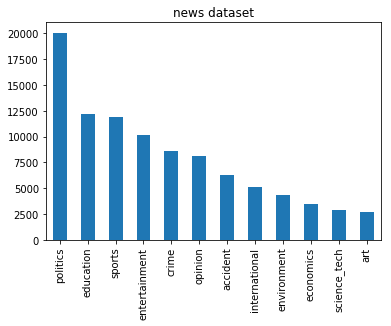

In [0]:
fig, ax = plt.subplots(1,1)
df.label.value_counts().plot("bar", ax=ax).set_title('news dataset')
fig.show()

### News Language Model

In [0]:
bs = 32
bptt = 70
vocab = " !\"#$%&'()*+,-./0123456789:;=<>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]^_`abcdefghijklmnopqrstuvwxyz{|}~¥§©±ঃঅআইঈউঊঋএঐওঔকখগঘঙচছজঝঞটঠডঢণতথদধনপফবভমযরলশষসহ়ািীুূৃেৈোৌ্ৎৗড়ঢ়য়০১২৩৪৫৬৭৮৯৷‘’‚“”‪™−√∝∞"

In [0]:
class NewTokenizer(BaseTokenizer):
    def tokenizer(self,t):
      return [BOS]+[i for i in t]

https://gist.github.com/EdwardJRoss/86b31848a7951411de56f10f55e9de4e

https://forums.fast.ai/t/per-character-tokenizer/31121/2

https://forums.fast.ai/t/character-level-language-model/31379

In [0]:
# 'xxunk',
#  'xxpad',
#  'xxbos',
#  'xxeos',
#  'xxfld',
#  'xxmaj',
#  'xxup',
#  'xxrep',
#  'xxwrep'

In [0]:
UNK, PAD, BOS, EOS, FLD, TK_REP, TK_WREP

('xxunk', 'xxpad', 'xxbos', 'xxeos', 'xxfld', 'xxrep', 'xxwrep')

In [0]:
itos = [UNK, PAD, BOS, EOS, FLD, TK_REP, TK_WREP] + [i for i in vocab]

In [0]:
len(itos)

188

In [0]:
vocab=Vocab(itos)
tokenizer=Tokenizer(NewTokenizer, pre_rules=[], post_rules=[])

In [0]:
# defaults.cpus=1

In [0]:
# df = pd.read_csv(news/'full_doc.csv')
# df2 = df.head(100)
# df2.to_csv(news/'small_test.csv',index=False)
# df2 = pd.read_csv(news/'small_test.csv')
# df2.head()

### On half of the dataset

In [0]:
data_lm = TextLMDataBunch.from_csv(char , 'news_3less.csv', bs=bs , bptt=bptt,tokenizer=tokenizer, vocab=vocab)
data_lm.save('news_char_3less.pkl')

In [0]:
data_lm = load_data(char, 'news_char_3less.pkl', bs=bs)

In [0]:
data_lm.show_batch()

idx,text
0,স া ধ া র ণ ্ য ে প র ি চ য ় ছ ি ল ত া xxunk র ‘ ভ া ব ি ’ ব ল ে xxunk অ স া ধ া র ণ প ্ র ত ি ভ া ধ র ব ্ য ক
1,ত ্ ত ে র ছ ু র ি ক া ঘ া ত ে এ ক প ্ র ব া স ী খ ু ন হ য় ে ছ ে xxunk ন ি হ ত জ ি য় া খ া ন ে র ( ৩ ০ )
2,ব া হ ি ন ী স হ স ম ভ া ব া প ন ্ ন ব া হ ি ন ী গ ু ল ে া ক ে ন ি র ্ দ ে শ ন া দ ি ত ে এ স ব ব া হ ি ন ী প া ঠ
3,ে য় ত া ক ে ট ে গ ে ছ ে এ ব xxunk এ ই খ া ত ে র প ্ ত া ন ি র ল ক ্ ষ ্ য ম া ত ্ র া গ ত ব ছ র ে র
4,প ঞ ্ চ া য় ে ত ব া ড় ি র চ া xxunk দ প ু র ম ো ড় ে এ দ ু র ্ ঘ ট ন া ঘ ট ে xxunk এ ত ে ম ট র স া ই ক ে ল ট ি র


In [0]:
''.join(data_lm.train_dl.vocab.itos)

'xxunkxxpadxxbosxxeosxxfldxxrepxxwrep !"#$%&\'()*+,-./0123456789:;=<>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]^_`abcdefghijklmnopqrstuvwxyz{|}~¥§©±ঃঅআইঈউঊঋএঐওঔকখগঘঙচছজঝঞটঠডঢণতথদধনপফবভমযরলশষসহ়ািীুূৃেৈোৌ্ৎৗড়ঢ়য়০১২৩৪৫৬৭৮৯৷‘’‚“”\u202a™−√∝∞'

In [0]:
data_lm.train_dl.vocab.itos[:10]

['xxunk', 'xxpad', 'xxbos', 'xxeos', 'xxfld', 'xxrep', 'xxwrep', ' ', '!', '"']

In [0]:
len(data_lm.train_dl.vocab.itos)

188

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained=False, drop_mult=0.5)

In [0]:
learn.lr_find()
learn.recorder.plot()

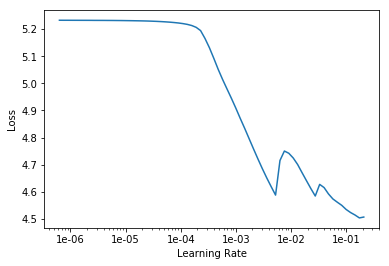

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('news_char_3less_1');

epoch,train_loss,valid_loss,accuracy,time
0,1.266953,1.232749,0.635639,1:34:01


In [0]:
learn.load('news_char_3less_1');
learn.fit_one_cycle(1, 1e-2)
learn.save('news_char_3less_2');

epoch,train_loss,valid_loss,accuracy,time
0,1.213312,1.154551,0.657214,1:35:38


In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('news_char_3less_3');

epoch,train_loss,valid_loss,accuracy,time
0,1.180011,1.110684,0.669536,1:35:42


In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('news_char_3less_4');

epoch,train_loss,valid_loss,accuracy,time
0,1.100991,1.084777,0.676783,1:35:43


In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('news_char_3less_5');

epoch,train_loss,valid_loss,accuracy,time
0,1.116093,1.051846,0.686482,1:35:37


### Training on rest of the data 
Due to memory limitations, the dataset was split into half and model was trained in turns.

#### Making csv

In [0]:
df = pd.read_csv(news/'full_doc.csv')
len(df['label'].unique())

12

In [0]:
print(len(df))
df = df[(df['label']=='politics') | (df['label']=='sports') | (df['label']=='education')]
print(len(df))

95855
44165


In [0]:
df.to_csv(char/'news_3.csv',index=False)

In [0]:
df = pd.read_csv(char/'news_3.csv')
len(df['label'].unique())

3

In [0]:
df.head()

,label,text,is_valid
0,politics,আদালতে ‘অতি উৎসাহীদের’ রিট আবেদনের কারণে নারায়...,False
1,politics,চলমান হরতাল শুক্রবার সকাল ছয়টা পর্যন্ত বাড়ান...,False
2,politics,"ঢাকা, জুন ০৮ (বিডিনিউজ টোয়েন্টিফোর ডটকম)- রাজন...",False
3,politics,"ঢাকা, সেপ্টেম্বর ২৫ (বিডিনিউজ টুয়েন্টিফোর ডটকম...",False
4,politics,একাত্তরে গণহত্যার দায়ে দলের স্থায়ী কমিটির সদস্...,False


#### training

In [0]:
data_lm = TextLMDataBunch.from_csv(char , 'news_3.csv', bs=bs , bptt=bptt,tokenizer=tokenizer, vocab=vocab)
data_lm.save('news_char_3.pkl')

In [0]:
data_lm=load_data(char,'news_char_3.pkl',bs=bs)

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained=False, drop_mult=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


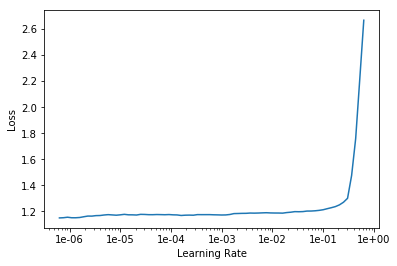

In [0]:
learn.load('news_char_3less_5');
learn.lr_find()
learn.recorder.plot()

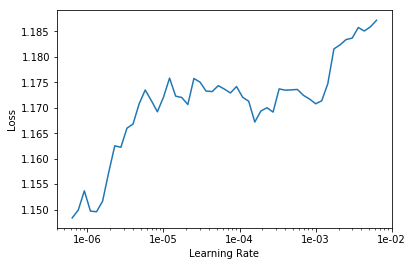

In [0]:
learn.recorder.plot(skip_end=30)

In [0]:
learn.fit_one_cycle(1, 1e-6)
learn.save('news_char_3_6');

epoch,train_loss,valid_loss,accuracy,time
0,1.172690,1.142340,0.667459,1:22:04


In [0]:
learn.load('news_char_3_6');
learn.fit_one_cycle(1, 1e-6)
learn.save('news_char_3_7');

epoch,train_loss,valid_loss,accuracy,time
0,1.166844,1.137227,0.668367,1:22:11


In [0]:
learn.load('news_char_3_7');
learn.fit_one_cycle(1, 1e-6)
learn.save('news_char_3_8');

/usr/local/lib/python3.6/dist-packages/fastai/basic_train.py:327: UserWarning: Wasn't able to properly load the optimizer state again.
  except: warn("Wasn't able to properly load the optimizer state again.")


epoch,train_loss,valid_loss,accuracy,time
0,1.156617,1.133068,0.669145,1:22:05


In [0]:
learn.fit_one_cycle(1, 1e-6)
learn.save('news_char_3_9');

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.fit_one_cycle(1, 1e-6)
learn.save('news_char_3_10');

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

### Again other half

In [0]:
data_lm = load_data(char, 'news_char_3less.pkl', bs=bs)
learn = language_model_learner(data_lm, AWD_LSTM, pretrained=False, drop_mult=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


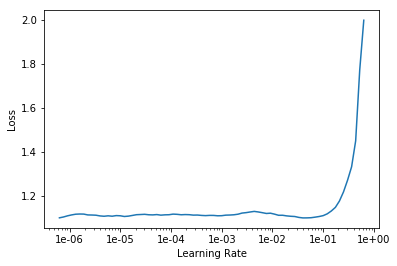

In [0]:
learn.load('news_char_3_10');
learn.lr_find()
learn.recorder.plot()

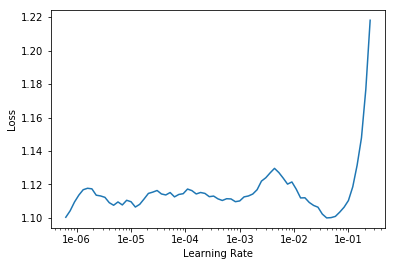

In [0]:
learn.recorder.plot(skip_end=10)

In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('news_char_3less_11');

epoch,train_loss,valid_loss,accuracy,time
0,1.123917,1.042731,0.689038,1:35:48


In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('news_char_3less_12');

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.load('news_char_3less_12');
learn.fit_one_cycle(1, 1e-2)
learn.save('news_char_3less_13');

epoch,train_loss,valid_loss,accuracy,time
0,1.068634,1.025688,0.694038,3:14:10


In [0]:
learn.load('news_char_3less_13');
learn.fit_one_cycle(1, 1e-2)
learn.save('news_char_3less_14');

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.load('news_char_3less_14');
learn.fit_one_cycle(1, 1e-2)
learn.save('news_char_3less_15');

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

## BAAD6 Dataset 

### Fine Tuning

In [0]:
bs = 128
data_lm_AA = TextLMDataBunch.from_csv(aa2, 'ulm_train.csv', vocab=vocab, bs=bs, tokenizer=tokenizer)
data_lm_AA.save('bhai_AA_char_lm.pkl')

In [0]:
data_lm_AA.show_batch()

idx,text
0,স ি ট ি ক র ্ প ে া র ে শ ন ে র ( ড ি এ স স ি স ি ) ব র ্ ধ ি ত স ী ম া ন া য় ন ত ু ন য ু ক ্ ত হ ও য় া
1,ে র ম ন ে র ভ ে ত র ে স া ম া ন ্ য এ ক ট ু আ শ া ব ি শ া ল ন ি র া শ া ক ে গ ল া ট ি প ে ধ র ে
2,ো আ ন ্ ত র ্ জ া ত ি ক স ন দ ক ি য ু ক ্ ত র া ষ ্ ট ্ র অ ন ু স র ণ ক র ে ছ ি ল ো ত খ ন ? আ র ব া xxunk ল
3,্ য ক ্ ত ি গ ত অ ফ ি স ে প ে ট ্ র ল ব ো ম া হ া ম ল া চ া ল া ন ো হ য় xxunk এ র প ্ র ত ি শ ো ধ ন ি ত ে স
4,"ক ে ন ত ি ন ি ব ে xxunk চ ে থ া ক ব ে ন ? ক ে উ শ ু ন ত ে চ া য় ন া ত া xxunk র গ ল ্ প , ক ে উ ব ি শ ্"


In [0]:
data_clas = TextClasDataBunch.from_csv(aa2, 'ulm_train.csv', vocab=vocab, bs=bs, tokenizer=tokenizer)
data_clas.save('bhai_AA_char_clas.pkl')

In [0]:
data_clas.show_batch()

text,target
xxbos x x b o s দ ে খ ি ত ে গ ি য় া ছ ি প র ্ ব ত ম া ল া এ ক ট ু ব ড় . . . ল ে খ া ট া ২ ০ ০ ৪ স া ল ে র,hm
xxbos x x b o s দ ে খ ি ত ে গ ি য় া ছ ি প র ্ ব ত ম া ল া এ ক ট ু ব ড় . . . ল ে খ া ট া ২ ০ ০ ৪ স া ল ে র,hm
xxbos x x b o s চ া হ ি দ া প ত ্ র ১ . ম ক ব ু ল স ্ ক ্ র ি ন থ ে ক ে চ ো খ স র ি য ় ে প র ্ য ব ে ক ্ ষ ণ,hm
xxbos x x b o s গ ো য ় ে ন ্ দ া ঝ া ক া ন া ক া ও ম ি স ্ ট া র অ ্ য া ন ্ ড ম ি স ে স হ া ফ ম জ ু র হ ত ্ য,hm
xxbos x x b o s গ ো য ় ে ন ্ দ া ঝ া ক া ন া ক া ও প ি স ু ন চ ্ ছ া ড ় র হ স ্ য ১ . গ ো য ় ে ন ্ দ া ব ি ভ,hm


In [0]:
data_clas.y.classes

['fe', 'hm', 'ij', 'mk', 'rg', 'rn']

In [0]:
data_lm_AA=load_data(aa2,'bhai_AA_char_lm.pkl',bs=bs)

In [0]:
learn = language_model_learner(data_lm_AA, AWD_LSTM, pretrained=False, drop_mult=0.5)

In [0]:
learn.load(char/'models'/'news_char_3less_15');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


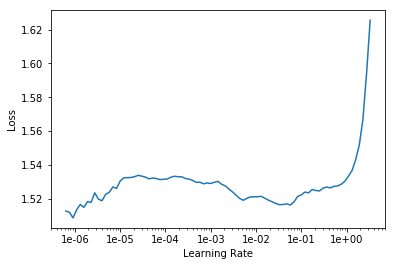

In [0]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

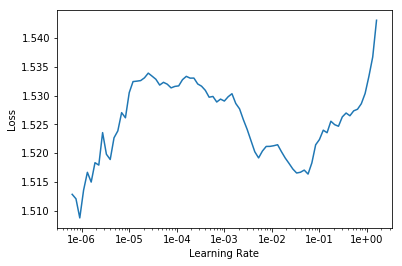

In [0]:
learn.recorder.plot(skip_end=9)

In [0]:
learn.load(char/'models'/'news_char_3less_15');
learn.fit_one_cycle(2, 1e-3)
learn.save('bhai_AA_lm_char_head');

epoch,train_loss,valid_loss,accuracy,time
0,1.473046,1.419653,0.592260,10:20
1,1.461788,1.415155,0.593339,10:19


In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(2, 1e-3)
learn.freeze_to(-3)
learn.fit_one_cycle(2, 1e-3)
learn.save('bhai_AA_lm_char_body_1')

epoch,train_loss,valid_loss,accuracy,time
0,1.442564,1.381362,0.600200,10:44
1,1.438293,1.372215,0.602020,10:47


epoch,train_loss,valid_loss,accuracy,time
0,1.377942,1.350190,0.607389,12:28
1,1.369025,1.339449,0.610051,12:27


In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)
learn.save('bhai_AA_lm_char_body_2')

epoch,train_loss,valid_loss,accuracy,time
0,1.368189,1.333226,0.611407,13:43
1,1.354316,1.333311,0.613412,13:44
2,1.540951,1.479877,0.608290,13:43
3,1.540917,1.498211,0.608302,13:40


In [0]:
learn.save_encoder('bhai_AA_lm_char_enc')

### Classifier

In [0]:
bs = 32
data_clas=load_data(aa2,'bhai_AA_char_clas.pkl',bs=bs)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


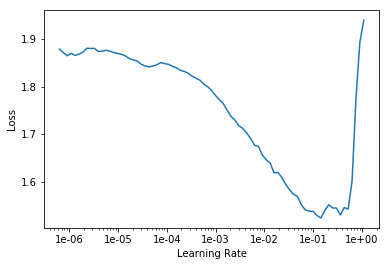

In [0]:
learn_cls = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False)
learn_cls.load_encoder('bhai_AA_lm_char_enc')
learn_cls.freeze()
learn_cls.lr_find()
learn_cls.recorder.plot()

In [0]:
learn_cls.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))
learn_cls.save('bhai_char_cls')

epoch,train_loss,valid_loss,accuracy,time
0,1.271401,1.155595,0.642659,14:11
1,0.961190,0.695338,0.792244,14:16


In [0]:
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))
learn_cls.save('bhai_char_cls_2')

epoch,train_loss,valid_loss,accuracy,time
0,0.835431,0.901532,0.673130,13:41
1,0.733675,0.578984,0.819945,13:57


In [0]:
learn_cls.freeze_to(-3)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))
learn_cls.save('bhai_char_cls_3')

epoch,train_loss,valid_loss,accuracy,time
0,0.717260,0.615538,0.795014,16:40
1,0.655212,0.543692,0.803324,14:44


In [0]:
learn_cls.unfreeze()
learn_cls.fit_one_cycle(4, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
learn_cls.save('bhai_char_cls_4')

epoch,train_loss,valid_loss,accuracy,time
0,0.554830,0.496858,0.828255,16:03
1,0.534860,0.498113,0.833795,16:46
2,0.493862,0.470080,0.842105,17:15
3,0.468614,0.490881,0.828255,17:44


In [0]:
def testing(dts):
  df = pd.read_csv(dts) 
  text_array = df["text"].tolist()
  print(len(text_array))

  final_preds = []

  for text in text_array:
      preds = learn_cls.predict(text)
      final_preds.append(str(preds[0]))

  targets = df["label"].tolist()

  err=[]
  count =0;
  tst = len(text_array)

  for i in range(tst):
      if(targets[i]==final_preds[i]):
          count = count+1
      else:
  #         print(targets[i] + ", " + final_preds[i] + ';')
          err.append((targets[i],final_preds[i]))
  print("Accuracy: ")
  print(count/tst)
  print(err)
  
  return final_preds,targets

In [0]:
preds,targ = testing(aa2/'ulm_test.csv')

300
Accuracy: 
0.8366666666666667
[('rg', 'mk'), ('rn', 'fe'), ('ij', 'rn'), ('ij', 'rn'), ('rg', 'hm'), ('rn', 'hm'), ('rn', 'mk'), ('rn', 'rg'), ('ij', 'hm'), ('fe', 'rg'), ('rg', 'mk'), ('ij', 'rn'), ('rg', 'rn'), ('rg', 'rn'), ('rg', 'rn'), ('rg', 'mk'), ('rn', 'mk'), ('fe', 'hm'), ('rn', 'ij'), ('mk', 'hm'), ('rg', 'mk'), ('rn', 'mk'), ('rg', 'mk'), ('rg', 'fe'), ('ij', 'rn'), ('rg', 'ij'), ('rg', 'ij'), ('hm', 'mk'), ('ij', 'rn'), ('ij', 'rg'), ('rg', 'hm'), ('rn', 'hm'), ('rn', 'rg'), ('fe', 'rn'), ('ij', 'rn'), ('fe', 'mk'), ('fe', 'mk'), ('fe', 'rg'), ('ij', 'rn'), ('mk', 'rg'), ('hm', 'rg'), ('rg', 'rn'), ('fe', 'mk'), ('ij', 'rn'), ('hm', 'rn'), ('rn', 'mk'), ('rn', 'hm'), ('rn', 'rg'), ('rg', 'rn')]


In [0]:
from sklearn.metrics import f1_score
out  = f1_score(targ, preds, average='macro') #'macro' , also == weighted cuz dataset is balanced
out

0.8360222369123419